# 1. Introduction

In this notebook we are going to deal with a supervised learning (learning with teacher/labels) problem called Support Vector Machine(SVM). Supervised learning is further divided into :
    1. Classification
    2. Regression
The agenda of this notebook is related to SVM under the class of regression (though it is also used under classification also). So only regression and SVM is targeted in this notebook

## 1.1. Regression

The similarity between classification and regression (which make them children of same parent class i.e. supervised learning) that both take a set of training instances and learn a mapping to a target value.But classification is different from regression because under the regression the target value is a continous class value. 

### 1.1.1 Support Vector Machine using Regression (SVR)

Support Vector Machine under regression is bit different from simple regression. In regression the objective is to try to minimize the error rate but in SVR the objective is to try fitting the error in the range of a certain thresholds. In regression SVM maintains all the important features to maximal margin. In all the regressors, the function tries to fit a line to the data cost function minimization which is a intersting concept in the linearly continous data but in case of SVR with the deploymeny of a non-linear kernel, non-linear regression is also possible by fitting the curve rather than line. SVR is little bit different from conventational regression, due to this reason this notebook is a bit different,below are important points in regards of this notebook
    1. SVR comes with different kernel (linear,poly and rbf) in which rbf is default. In this notebook 2 different SVRs (one is with poly and other with rbf kernel) used.
    2. In this notebook comparsion between two SVRs have been shown via graphs which can be used to compare these two models.
    3. Models are also evaluated using graph (by showing the allignment of a real time prediction), not by using conventional methods of validation of models.

# 2. Steps Involved:
    0. Importing the required libraries - For importing all the dependencies.
    1. Making the Fucntions of the required steps.
    2. Importing dataset - For importing Dataset in the programm.
    3. Feature Engineering - For getting features from the dataset.
    4. Exploratory Data Analysis (EDA) - for checking the nature and structure of the dataset 
    5. Pre-processing
    6. Models Building - For Building the model (using sklearn).
    7. Models Fitting - Fitting the model for clustering.
    8. Saving the models - For re-use.
    9. Loading the models - for loading the trained model
    10. Evaluation and comparison of the models - For cheking the utility of the models and comparing them using graphs. 
    11. Conclusion


# 3. Prerequisties

## 3.1 Dataset

position_salaries.csv has been used as dataset which is consist of 5 columns:
    1. Position 
    2. Level
    3. Salaries
This dataset is dumy dataset which contains only 10 entries.

## 3.2 Libraries Requirements
    scikit-learn == 0.19.1
    scipy == 1.1.0
    pandas == 0.23.1
    matplotlib == 2.0.2
    numpy == 1.16.3
    pickle == 0.7.4

# 4. Use Case
Some famous use cases for which Support Vector Machine using regression can be used:
    1. For performing non-linear regression
    2. For multivariate forecasting
    3. Time series forecasting
    4. Calibrating traffic flow models
    5. Stock price prediction/forecasting


## Step 0. Importing the required libraries

In [171]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from matplotlib.colors import ListedColormap
import pickle

## Step 1. Making the Fucntions of the required steps

In [172]:
# FUNCTION FOR IMPORTING THE DATASET
# Input:path of the dataset (CSV)
# Output:dataframe 
                                   
def import_dataset(path):
  rd=pd.read_csv(path)
  return rd

In [173]:
# FUNCTION FOR SPLITING THE DATASET INTO TRAIN DATASET
# Input:dataframe
# Output:target and features dataset

def split_dataset(df):
    X = dataset.iloc[:,1].values
    y = dataset.iloc[:,-1].values
    # reshape x and y because they just have one feature
    X = X.reshape(-1,1)
    y = y.reshape(-1,1)
    return X,y

In [174]:
# FUNCTION FOR SPILTING THE DATA INTO TRAIN AND TEST DATASET
# Input:features dataset, target dataset
# Output:train dataset,test dataset
def split_train_test(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    return X_train, X_test, y_train, y_test 

In [175]:
# FUNCTION FOR SCALING THE DATA
# Input:training features dataset and testing features dataset
# Output:Scaled datasets
def scaler(X,y):
    sc_X = StandardScaler()
    X = sc_X.fit_transform(X)
    sc_y = StandardScaler()
    y = sc_y.fit_transform(y)
    y = y.reshape(len(y),)
    print (y)
    pickle.dump(sc_X, open('scaling_models/scaler_SVR_X.pickle', 'wb'))
    pickle.dump(sc_y, open('scaling_models/scaler_SVR_y.pickle', 'wb'))
    return X,y

In [176]:
#FUNCTION FOR BUILDING THE MODEL
#Input:none
#Output:regressor
def model_build_rbf():
    regressor_rbf=SVR(kernel='rbf')
    return regressor_rbf

def model_build_poly():
    regressor_poly=SVR(kernel='poly')
    return regressor_poly

In [177]:
#FUNCTION FOR TRAINING THE MODEL
#Input:classifier, features and target dataset (training)
#Output:trained model
def model_train(regressor,X,y):
    model = regressor.fit(X,y)
    return model    

In [178]:
#FUNCTION FOR SAVING MODEL
#Input:trained model
#Output:none
def model_save(model,name):
    pickle.dump(model, open('models/%s.pickle'%name, 'wb'))

In [179]:
#FUNCTION FOR LOADING MODEL
#Input:Path of saved model
#Output:Loaded model
def model_load(path_model):
    model_loaded=pickle.load(open(path_model, 'rb'))
    return model_loaded

In [195]:
#FUNCTION FOR LOADING SCALER MODEL 
#Input:path of scaler model
#Output:loaded scaling model
def scaler_load(path_scaler):
    sc_loaded=pickle.load(open(path_scaler, 'rb'))
    return sc_loaded

In [181]:
#FUNCTION FOR PREDICTIONS
#Input:model,dataset for predictions
#Output:predictions
def prediction(model_loaded,X_test,sc_X_loaded,sc_y_loaded):
    y_pred=sc_y_loaded.inverse_transform(model.predict(sc_X_loaded.transform(np.array([[6.5]]))))
    return y_pred

In [182]:
#FUNCTION FOR VALIDATIONS
#Input:predictions and real dataset
#Output:consfusion matrix, accuracy and classification report
def validation(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return cm,accuracy,report

## Step 2. Importing dataset

In [183]:
# importing the dataset
path_dataset = "data/position_salaries.csv"
df = import_dataset(path_dataset) 
print (df)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


## Step 3. Exploratory Data Analysis (EDA)

In [184]:
# Checking the nature of the entiries of Dataset
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [185]:
# Checking the shape of the Dataset
df.shape

(10, 3)

In [186]:
# Checking the structure of the Dataset and Data type of all the variables of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


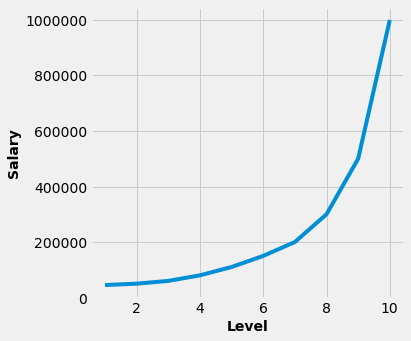

In [187]:
# Ploting the graph between salary and level which can the relationship in between
plt.figure()

x = df['Level']
y1 = df['Salary']
plt.xlabel('Level', fontdict=font_style)
plt.ylabel('Salary', fontdict=font_style)
plt.plot(x,y1)
plt.show()

## Step 4.  Feature Engineering 

In [188]:
# Spliting the Dataset (Feature Extraction - Extracting the Features variables as X and target vairables as y)
X,y = split_dataset(df)
print (X,y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] [[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Step 5. Pre-processing

In [190]:
# Scaling the Training and Test dataset 
X_scaled,y_scaled = scaler(X,y)
print (X_scaled,y_scaled)

[-0.72004253 -0.70243757 -0.66722767 -0.59680786 -0.49117815 -0.35033854
 -0.17428902  0.17781001  0.88200808  2.64250325]
[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]] [-0.72004253 -0.70243757 -0.66722767 -0.59680786 -0.49117815 -0.35033854
 -0.17428902  0.17781001  0.88200808  2.64250325]


/home/suryakant/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Step 6. Model Building

In [191]:
regressor_rbf = model_build_rbf()
print (regressor_rbf)
regressor_poly = model_build_poly()
print (regressor_poly)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


## Step 7. Model Fitting & Step 8. Model Saving

In [192]:
## Training the model and saving the model in same step (for further info see the defination of the function above )
model_rbf=model_train(regressor_rbf,X_scaled,y_scaled)
model_save(model_rbf,name = 'SVR_rbf')
model_poly=model_train(regressor_poly,X_scaled,y_scaled)
model_save(model_poly,name = 'SVR_poly')

## Step 9. Model loading 

In [193]:
## Saving the model
path_model_poly = 'models/SVR_poly.pickle'
model_loaded_poly = model_load(path_model_poly)
path_model_rbf =  'models/SVR_rbf.pickle'
model_loaded_rbf = model_load(path_model_rbf)

## Step 10. Model Evaluation 

/home/suryakant/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


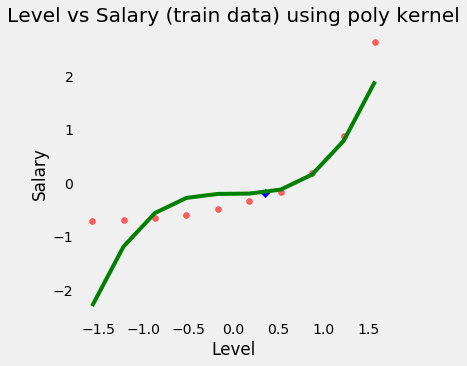

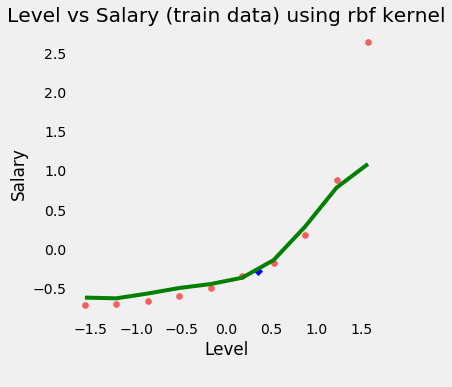

In [198]:
# scaling test data for prediction
test = np.zeros(1) # we are testing just one value
test[0]= 6.5
test = test.reshape(1,1) # reshape to 2D array!
# loading scaler model again
path_sc_X = 'scaling_models/scaler_SVR_X.pickle' 
sc_X_loaded = scaler_load(path_sc_X)
path_sc_y = 'scaling_models/scaler_SVR_y.pickle' 
sc_y_loaded = scaler_load(path_sc_y)
# rescaling test data like train data
test =sc_X_loaded.transform(test) 

# making prediction
y_pred = model_loaded_poly.predict(test)

# inverse scalingy y to real value
y_predict = sc_y_loaded.inverse_transform(y_pred)

#visualize the fitted model and our data
plt.scatter(X_scaled,y_scaled,color ='red', alpha=0.6)
plt.scatter(test,y_pred,color = 'blue', marker='D')
plt.plot(X_scaled,model_loaded_poly.predict(X_scaled),color='green')
plt.title('Level vs Salary (train data) using poly kernel')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.grid()
plt.show()


#################################

# making prediction
y_pred = model_loaded_rbf.predict(test)

# inver scalingy y to real value
y_predict =  sc_y_loaded.inverse_transform(y_pred)

#visualize the fitted model and our data
plt.scatter(X_scaled,y_scaled,color ='red', alpha=0.6)
plt.scatter(test,y_pred,color = 'blue', marker='D')
plt.plot(X_scaled,model_loaded_rbf.predict(X_scaled),color='green')
plt.title('Level vs Salary (train data) using rbf kernel')
plt.xlabel('Level\n')
plt.ylabel('Salary')
plt.legend()
plt.grid()
plt.show()


#### Blue dot represent the real-time prediction and green line represents the predictions from the training data

## Step 11. Conclusion

1. Blue dot represent the real-time prediction and green line represents the predictions from the training data
2. Both model can be used for the same purpose, above are the graphs which demonstrate the performance of the models (as blue dot lies within the graph, which means models performed good).
3. But rbf kernel SVR is lieing more within the graph as compare to poly kernel SVR.